**1. Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

**2. Loading Data**

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Data/Strongest Drop/APH.xlsx", parse_dates=['Date'], index_col='Date')
df

,Open,Close,High,Low
Date,,,,
2021-07-01,46880,46800,47120,46080
2021-07-02,46640,45600,46800,45520
2021-07-05,45600,44240,45760,43680
2021-07-06,44240,44160,45040,44080
2021-07-07,44160,44160,44800,43360
...,...,...,...,...
2022-03-28,29050,29300,30000,28400
2022-03-29,29300,30500,30900,29250
2022-03-30,29900,28600,30300,28400


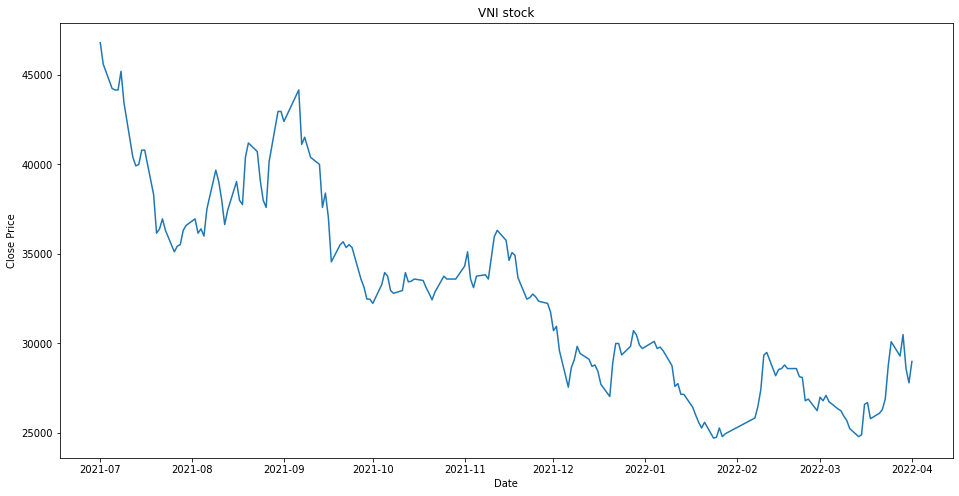

In [ ]:
plt.figure(figsize = (16,8))
plt.title('VNI stock')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(df['Close'])
plt.show()

**3. Create a table with only 'Close' values column**

In [ ]:
df = df[['Close']]
df.head()

,Close
Date,
2021-07-01,46800
2021-07-02,45600
2021-07-05,44240
2021-07-06,44160
2021-07-07,44160


**4. Create a future_days variable for predicting**

In [ ]:
future_days = 59
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(150)

<ipython-input-22-c443a6fc84cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction'] = df[['Close']].shift(-future_days)


,Close,Prediction
Date,,
2021-08-25,38000,34920.0
2021-08-26,37600,33680.0
2021-08-27,40160,32480.0
2021-08-30,42960,32560.0
2021-08-31,42960,32760.0
...,...,...
2022-03-28,29300,NaN
2022-03-29,30500,NaN
2022-03-30,28600,NaN


**5. Training and Testing**

In [ ]:
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
Y = np.array(df['Prediction'])[:-future_days]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3122, random_state = 0)

<ipython-input-23-bce0db80064b>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df.drop(['Prediction'], 1))[:-future_days]


**6. Create model using sklearn library**

In [ ]:
model = LinearRegression()
model.fit(X_train,Y_train)
model.score(X_test, Y_test)
# VNINDEX

0.4462659834807545

In [ ]:
X_future = df.drop(['Prediction'], 1)[:-future_days]
X_future = X_future.tail(future_days)
X_future = np.array(X_future)
# This variable is the previous 'future_days' days (59 days previous in 2021)
# We will use this to predict the next 59 days (till 1st April 2022)

<ipython-input-25-c8ba48309cb0>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_future = df.drop(['Prediction'], 1)[:-future_days]


**7. Predicting**

In [ ]:
linear_prediction = model.predict(X_future)

**8. Plot the data**

<ipython-input-27-3e2e9267b71e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


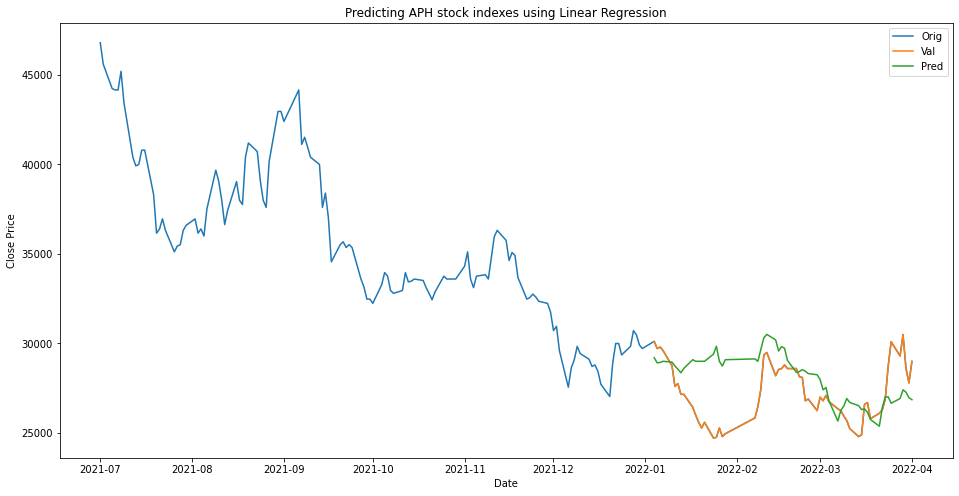

In [ ]:
predictions = linear_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize = (16,8))
plt.title('Predicting APH stock indexes using Linear Regression')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

In [ ]:
model.score(X_test, Y_test)

0.4462659834807545

**Mean Absolute Error**

In [ ]:
Y_future = np.array(df['Close'])[-future_days:] # actual future Y
mae = mean_absolute_error(Y_future, predictions)
mae

1581.5206219261202